In [1]:
import numpy as np
import pandas as pd
from os.path import join as oj
import os
import pandas as pd
import sys
import inspect
import datetime
from scipy.stats import percentileofscore
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)
sys.path.append(parentdir + '/modeling')
import load_data
from fit_and_predict import add_preds
from functions import merge_data
from viz import  viz_interactive
import numpy as np
import pandas as pd
from os.path import join as oj
import os
import pandas as pd
import sys
import matplotlib as plt
from scipy.stats import percentileofscore

# CHANGE THIS
from exponential_modeling import *
from fit_and_predict import *
#from pmdl_weights import * 

from shared_models import SharedModel


Loading BokehJS ...

In [2]:
# Load in the Data
print('loading data...')
NUM_DAYS_LIST = [1, 2, 3, 4, 5, 6, 7]
df_county = load_data.load_county_level(data_dir=oj(parentdir, 'data'))
#df_county = add_preds(df_county, NUM_DAYS_LIST=NUM_DAYS_LIST,
#                          cached_dir=oj(parentdir, 'data'))

loading data...
loading county-level data...
loaded and merged COVID-19 cases/deaths data successfully


In [3]:
# Currently selecting confirmed cases, can look at probable later
df_ucsf = pd.read_csv("../../covid-19-private-data/ucsf_hospitalization_data.csv", sep="\t")
df_ucsf = df_ucsf[["Date", "ZSFG COVID-19+ (total admitted)"]]
df_ucsf = df_ucsf.rename(columns={"ZSFG COVID-19+ (total admitted)": "hospitalizations"})
df_ucsf_hosp = df_ucsf["hospitalizations"] 
UCSF_data = np.array(df_ucsf_hosp.to_numpy())
UCSF_data
#UCSF_data = UCSF_data.reshape(1,UCSF_data.shape[0])
#df_shared_UCSF.head()
#print(UCSF_data[40])

array([ 0,  0,  1,  1,  0,  0,  0,  0,  1,  3,  2,  1,  0,  1,  2,  2,  4,
        7,  7,  7,  9, 13, 15, 16, 18, 21, 23, 22, 25, 27, 30, 30, 30, 32,
       31, 33, 34, 28, 25, 25, 27, 25, 24, 26, 25, 26, 25, 23, 18, 19, 19,
       22, 24, 25])

## Eval Mode for Linear,Exponential, and Shared Exponential

In [8]:
#Linear,Exponential,Shared_Exponential Eval Mode for UCSF Data
eval_start_day = 20;
lin_predictions = []
exp_predictions = []
shared_exp_predictions = []
for i in range(eval_start_day,UCSF_data.shape[0]):   
    tmp = UCSF_data[:i+1]
    d = {'Name':['UCSF'],'hospitalizations':[tmp]}
    df_shared_UCSF = pd.DataFrame(data = d)
    shared_pred = fit_and_predict_shared_exponential(df_shared_UCSF,mode = "eval_mode",outcome = "hospitalizations")
    shared_exp_predictions.append(shared_pred[0][0])
    tmp = tmp.reshape(1,tmp.shape[0])
    lin_pred = linear_fit(tmp,'eval_mode')
    lin_predictions.append(lin_pred[0][0])
    exp_pred = exponential_fit(tmp,'eval_mode')
    exp_predictions.append(exp_pred[0][0])
   

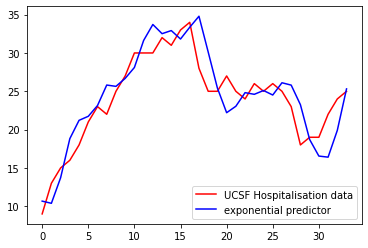

In [9]:
plt.plot(UCSF_data[eval_start_day:],'r',label='UCSF Hospitalisation data')
plt.plot(exp_predictions,'b',label='exponential predictor')
plt.legend()

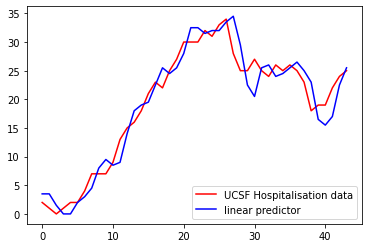

In [591]:
plt.plot(UCSF_data[eval_start_day:],'r',label='UCSF Hospitalisation data')
plt.plot(lin_predictions,'b',label='linear predictor')
plt.legend()


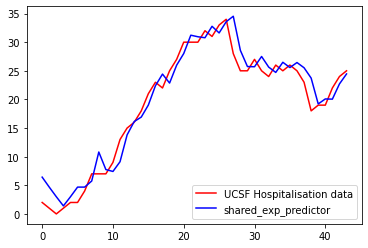

In [593]:
plt.plot(UCSF_data[eval_start_day:],'r',label='UCSF Hospitalisation data')
plt.plot(shared_exp_predictions,'b',label='shared_exp_predictor')
plt.legend()

## Defining Start Day and k

In [4]:
start_day = 20; # start_day >= 1; the index that we're predicting on
k = 3 #Number of days we want to predict ahead

## Future Predictions for Linear,Exponential, and Shared Exponential

In [275]:
lin_future_predictions = []
exp_future_predictions = []
shared_exp_future_predictions = []
for i in range(start_day,UCSF_data.shape[0]-k + 1):
    tmp = UCSF_data[:i] # Should there be an i+1 for predict_future? No
    d = {'Name':['UCSF'],'hospitalizations':[tmp]}
    df_shared_UCSF = pd.DataFrame(data = d)
    shared_future_pred = fit_and_predict_shared_exponential(df_shared_UCSF,mode = "predict_future",outcome = "hospitalizations",demographic_vars=[],target_day=np.array([k]), verbose=False)
    shared_exp_future_predictions.append(shared_future_pred[0][0])
    tmp = tmp.reshape(1,tmp.shape[0])
    lin_pred_future = linear_fit(tmp,'predict_future',target_day=np.array([k]))
    exp_pred_future = exponential_fit(tmp,'predict_future',target_day=np.array([k]))
    lin_future_predictions.append(lin_pred_future[0][0])
    exp_future_predictions.append(exp_pred_future[0][0])


Text(0.5, 1.0, '3-day ahead prediction for shared exponential predictor')

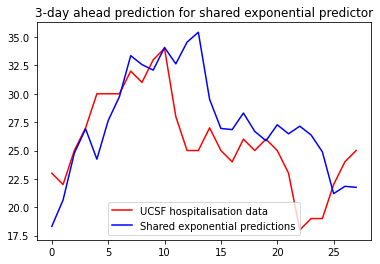

In [276]:
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(shared_exp_future_predictions,'b',label= "Shared exponential predictions")
plt.legend()
plt.title(str(k)+"-day ahead prediction for shared exponential predictor")

Text(0.5, 1.0, '3-day ahead prediction for linear predictior')

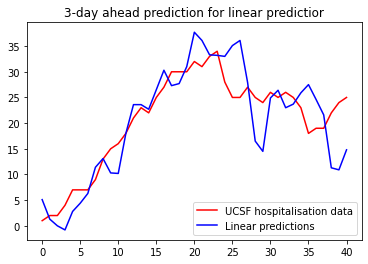

In [272]:
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(lin_future_predictions,'b',label= "Linear predictions")
plt.legend()
plt.title(str(k)+"-day ahead prediction for linear predictior")

Text(0.5, 1.0, '3-day ahead prediction for exponential predictior')

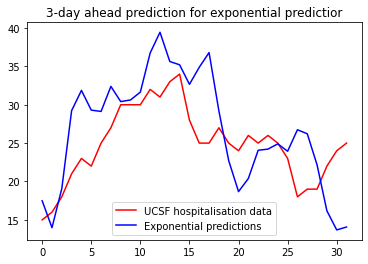

In [174]:
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(exp_future_predictions,'b',label= "Exponential predictions")
plt.legend()
plt.title(str(k)+"-day ahead prediction for exponential predictior")

In [72]:
#df_CA = df_county[df_county['StateName']=='CA']
# df_CA.head()

#len(df_CA['deaths'].iloc[0])
# County data start date: 1/22/20
# print(df_county.columns.values)
# UCSF data start date: 3/8/20
# UCSF first date with 3+ hospitalizations: 3/17/20, 10 days after UCSF start
# print(df_ucsf)

In [73]:
# Start predicting from 3/8/20 onwards
# 46 days from the 1/22/20 to 3/8/20, not including the end date
# UCSF first prediction is: 3/12/20 

# death_preds = []
# for day in range(#edit date range):
#     df_CA_test = df_CA.copy(deep=True)
#     #append preds to death_preds
#     fit_and_predict_ensemble(df_CA_test)['predicted_deaths_ensemble_1']
#     for county in range(len(df_CA)):
#             # do we need to remove columns and truncate counts??
#             # truncate list counts: deaths, cases, neighbor_deaths, neighbor_cases
#             for col in ['deaths', 'cases', 'neighbor_deaths', 'neighbor_cases']:
#                 df_CA_test[col].iloc[county] = df_CA_test[col].iloc[county][:day]


In [74]:
#  Why are we starting from 56?
# print(df_CA[df_CA['CountyName']=='San Francisco']['deaths'].values[0][56:])
# df_CA['deaths']

## Imputing Deaths 

$hospitalizations_{t} = \beta_0 hospitalizations_{t-1} + \beta_1 imputed\ deaths_{t} + \beta_2 imputed\ deaths_{t-1}$


In [5]:
shifted_date = 50 # 50 days between 1/22 and 3/12
cen = 4 # Number of days to censor on left + 1

In [76]:
# Calculate df_CA
df_CA = df_county[df_county['StateName'].isin(['CA', "WA"])]

# Compute the Imputed Deaths
# lin_impu_future_predictions = []
# exp_impu_future_predictions = []
# shared_impu_exp_future_predictions = []
## Censoring the UCSF_data

UCSF_cen = UCSF_data[cen:]
imputed_deaths = []

## Q: Should beginning of the range be 0 or the start_day?
## Q: Should we include this k? 
## A: I hate time series...
for i in range(1,UCSF_cen.shape[0]-k + 1): 
    df_CA_test = df_CA.copy(deep=True)
    # Calculate the Imputed Deaths
    for county in range(len(df_CA_test)):
            # do we need to remove columns and truncate counts??
            # truncate list counts: deaths, cases, neighbor_deaths, neighbor_cases
            for col in ['deaths', 'cases', 'neighbor_deaths', 'neighbor_cases']:
                # adding 1 to predict t
                df_CA_test[col].iloc[county] = df_CA_test[col].iloc[county][:shifted_date + i] 
    
    tmp = fit_and_predict_ensemble(df_CA_test, target_day=np.array([k]))
    sf_dop = tmp[tmp["CountyName"] == "San Francisco"]
    imputed_deaths.append(np.array(sf_dop["predicted_deaths_ensemble_" + str(k)])[0][0])

imputed_deaths = np.array(imputed_deaths)

In [17]:
# Should be a difference of k
print(len(imputed_deaths), UCSF_cen.shape)

49 (50,)


In [1017]:
preds = []

for i in range(start_day,UCSF_cen.shape[0]-k + 1): 
    
    # Calculate the Imputed Deaths
    tmp = UCSF_cen[:i] # day t-1
    deaths = imputed_deaths[:i] # day t
    
    assert len(tmp) == len(deaths) 
    
    d = {'Name':['UCSF'],'hospitalizations':[tmp], "imputed_deaths": [deaths]}
    df_shared_UCSF = pd.DataFrame(data = d)
    
    # Feature Transforms
    feat_transforms = {}
    feat_transforms["hospitalizations"] = [lambda x: np.log(x+1)]
    feat_transforms["imputed_deaths"] = [lambda x: np.log(x + 1)]
    
    # Auxiliary Time Variables
    aux_vars = ["imputed_deaths"]
    shared_model = SharedModel(df_shared_UCSF,mode = "predict_future",
                                                            outcome = "hospitalizations",
                                                            demographic_variables=[],
                                                            auxiliary_time_features=aux_vars,
                                                            target_days=np.array([k]), 
                                                            feat_transforms=feat_transforms,
                                                            time_series_default_values = 0,
                                                            scale=False)
    
    
    shared_model.create_dataset()
    shared_model.fit_model()
    shared_model.predict()
    
    preds.append(shared_model.predictions[0][0])
    

Text(0.5, 1.0, '3-day ahead prediction for shared exponential model w/ Imputed Deaths ')

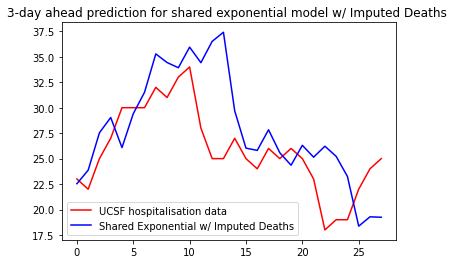

In [1020]:
plt.plot(UCSF_cen[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(np.array(preds),'b',label= "Shared Exponential w/ Imputed Deaths")
# plt.plot(shared_exp_future_predictions[cen:],'orange',label= "future shared exponential predictions")
plt.legend()
plt.title(str(k)+"-day ahead prediction for shared exponential model w/ Imputed Deaths ")

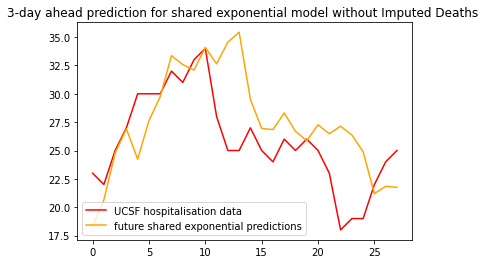

In [1021]:
plt.plot(UCSF_cen[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(shared_exp_future_predictions[cen:],'orange',label= "future shared exponential predictions")
plt.title(str(k)+"-day ahead prediction for shared exponential model without Imputed Deaths ")
plt.legend()

## Cummulative Sum


In [1025]:
# This is a cummulative sum
UCSF_transf = np.cumsum(UCSF_data)
lin_cum_future_predictions = []
exp_cum_future_predictions = []
shared_cum_exp_future_predictions = []
for i in range(start_day,UCSF_transf.shape[0]-k + 1):
    tmp = UCSF_transf[:i] # Should there be an i+1 for predict_future? No
    d = {'Name':['UCSF'],'hospitalizations':[tmp]}
    df_shared_UCSF = pd.DataFrame(data = d)
    
    shared_cum_future_pred = fit_and_predict_shared_exponential(df_shared_UCSF,mode = "predict_future",outcome = "hospitalizations",demographic_vars=[],target_day=np.array([k]), verbose=False)
    shared_cum_exp_future_predictions.append(shared_future_pred[0][0])
    tmp = tmp.reshape(1,tmp.shape[0])
    
    lin_cum_pred_future = linear_fit(tmp,'predict_future',target_day=np.array([k]))
    exp_cum_pred_future = exponential_fit(tmp,'predict_future',target_day=np.array([k]))
    lin_cum_future_predictions.append(lin_cum_pred_future[0][0])
    exp_cum_future_predictions.append(exp_cum_pred_future[0][0])

Text(0.5, 1.0, '3-day ahead prediction for linear predictor for cumulative sum')

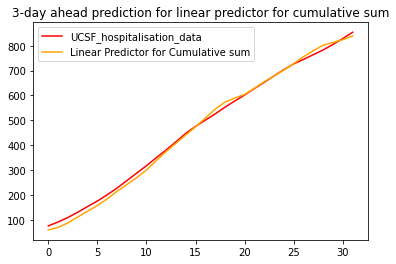

In [1026]:
plt.plot(UCSF_transf[start_day+k-1:],'r',label = "UCSF_hospitalisation_data")
plt.plot(lin_cum_future_predictions,'orange',label= "Linear Predictor for Cumulative sum")
plt.legend()
plt.title(str(k)+"-day ahead prediction for linear predictor for cumulative sum")

In [943]:
x = np.array(lin_future_predictions)
x[1:] -= x[:-1].copy()

Text(0.5, 1.0, '3-day ahead prediction for linear predictor based on cumulative sum')

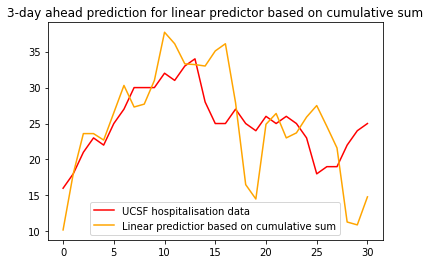

In [1027]:
plt.plot(UCSF_data[start_day+k:],'r',label = "UCSF hospitalisation data")
plt.plot(x[1:],'orange',label= "Linear predictior based on cumulative sum")
plt.legend()
plt.title(str(k)+"-day ahead prediction for linear predictor based on cumulative sum")

Text(0.5, 1.0, '3-day ahead prediction for linear predictor')

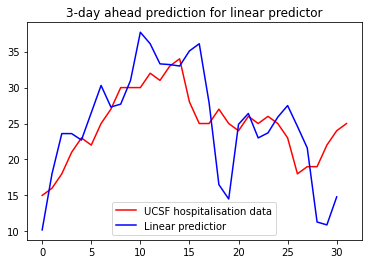

In [1029]:
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(lin_future_predictions[1:],'b',label= "Linear predictior")
plt.legend()
plt.title(str(k)+"-day ahead prediction for linear predictor")

## Ensemble Modeling

In [ ]:
ensemble = []
for i in range(start_day,UCSF_data.shape[0]-k+1): 
    tmp = UCSF_data[:i]
    d = {'Name':['UCSF'],'hospitalizations':[tmp]}
    df_shared_UCSF = pd.DataFrame(data = d)
    ensemble_prediction = fit_and_predict_ensemble(df_shared_UCSF,target_day = np.array([k]),outcome = 'hospitalizations', 
      methods = [exponential,linear],mode = 'predict_future', verbose = False)['predicted_hospitalizations_ensemble_3'].values[0][0]
    ensemble.append(ensemble_prediction)

print(ensemble)
#ensemble_prediction.head()


In [6]:
ensemble = []
for i in range(start_day,UCSF_data.shape[0]-k+1): 
    tmp = UCSF_data[:i]
    d = {'Name':['UCSF'],'hospitalizations':[tmp]}
    df_shared_UCSF = pd.DataFrame(data = d)
    ensemble_prediction = fit_and_predict_ensemble(df_shared_UCSF,target_day = np.array([k]),outcome = 'hospitalizations', 
      methods = [exponential,linear],mode = 'predict_future', verbose = False)['predicted_hospitalizations_ensemble_3'].values[0][0]
    ensemble.append(ensemble_prediction)

print(ensemble)
#ensemble_prediction.head()


[13.276891064430632, 11.112859092047623, 18.25186346148962, 25.84271475552648, 27.862588780501298, 25.95006584015146, 27.625141279384458, 31.073109166484173, 28.41349709476435, 28.866388204761392, 31.277062511330843, 37.23431312386023, 37.82311474923701, 34.46903204151841, 34.22502002159354, 32.840200699709335, 35.00179316060751, 36.43576080225331, 28.533823637435027, 19.592751786564094, 16.555065705503967, 22.731782754789048, 25.05290228924401, 23.73358313786582, 24.293324354003282, 24.916512969833583, 27.10838814291735, 25.44740912525309, 21.900153985702843, 13.866334878066665, 12.272125289290404, 14.438376440843122]


Text(0.5, 1.0, '3-day ahead prediction for shared exponential model w/ Imputed Deaths ')

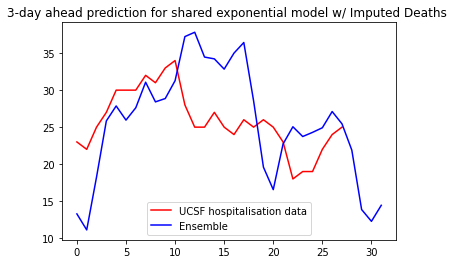

In [332]:
plt.plot(UCSF_cen[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(ensemble,'b',label= "Ensemble")
# plt.plot(shared_exp_future_predictions[cen:],'orange',label= "future shared exponential predictions")
plt.legend()
plt.title(str(k)+"-day ahead prediction for shared exponential model w/ Imputed Deaths ")

## Smoothing Methods

## MEPI

In [283]:
def mepi(start_t,shared_k_day_ahead):
    delta_shared = []
    for counter in range(0,5): 
        temp = UCSF_data[:start_t-k-counter]
        d = {'Name':['UCSF'],'hospitalizations':[temp]}
        df_shared_UCSF = pd.DataFrame(data = d)
        shared_predictor = fit_and_predict_shared_exponential(df_shared_UCSF,mode = "predict_future",outcome = "hospitalizations",
                             demographic_vars=[],target_day=np.array([k]), verbose=False)[0][0]
        delta_shared.append(abs(shared_predictor-UCSF_data[start_t-counter-1])/abs(shared_predictor))
    delta_shared_max = max(delta_shared)
    lower_shared_bound = -shared_k_day_ahead*(1-delta_shared_max)+shared_k_day_ahead
    upper_shared_bound = shared_k_day_ahead*(1+delta_shared_max) - shared_k_day_ahead
    PI_shared = [lower_shared_bound,upper_shared_bound]
    return PI_shared

In [284]:
shared_PI = []
for j in range(start_day,UCSF_data.shape[0]-k + 1):
    tmp = UCSF_data[:j] # Q: Should there be a j+1 for predict_future? A: No
    d = {'Name':['UCSF'],'hospitalizations':[tmp]}
    df_shared_UCSF = pd.DataFrame(data = d)
    shared_k_day_ahead = fit_and_predict_shared_exponential(df_shared_UCSF,mode = "predict_future",outcome = "hospitalizations",
                                                          demographic_vars=[],target_day=np.array([k]), verbose=False)[0][0]

    shared_PI.append(mepi(j,shared_k_day_ahead))

#     tmp = tmp.reshape(1,tmp.shape[0])
#     linear_k_day_ahead=linear_fit(tmp,'predict_future',target_day=np.array([k]))[0][0]
#     exponential_k_day_ahead = exponential_fit(tmp,'predict_future',target_day = np.array([k]))[0][0]
#     shared_PI.append(mepi(j,shared_k_day_ahead,linear_k_day_ahead,exponential_k_day_ahead))
#     #lin_PI.append(mepi(j,shared_k_day_ahead,linear_k_day_ahead,exponential_k_day_ahead)[1])
#     #exp_PI.append(mepi(j,shared_k_day_ahead,linear_k_day_ahead,exponential_k_day_ahead)[2])

Text(0.5, 1.0, '3-day ahead prediction for UCSF-hospitilisation ')

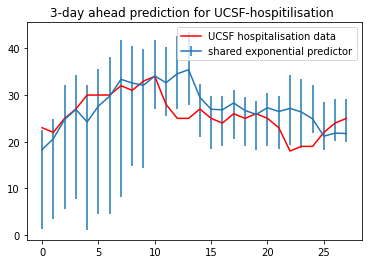

In [285]:
shared_PI = np.array(shared_PI).reshape(2,len(shared_PI))
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
ax1.errorbar(list(range(0,len(shared_exp_future_predictions))),shared_exp_future_predictions,yerr = shared_PI,label = "shared exponential predictor" )
ax1.legend()
ax1.set_title(str(k)+"-day ahead prediction for UCSF-hospitilisation ")
#ax2.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
#ax2.plot(shared_exp_future_predictions,'b',label= "Shared exponential predictions")

<ErrorbarContainer object of 3 artists>

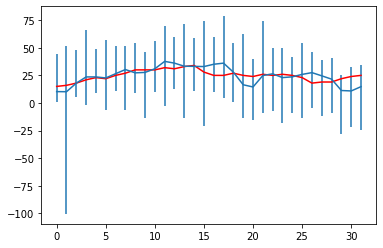

In [101]:
lin_PI = np.array(lin_PI).reshape(2,32)
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.errorbar(list(range(0,len(lin_future_predictions))),lin_future_predictions,yerr = lin_PI)